 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8889/notebooks/Survival.ipynb#Survival-on-the-Titanic" data-toc-modified-id="Survival-on-the-Titanic-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Survival on the Titanic</a></span><ul class="toc-item"><li><span><a href="http://localhost:8889/notebooks/Survival.ipynb#Executive-Summary" data-toc-modified-id="Executive-Summary-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Executive Summary</a></span></li><li><span><a href="http://localhost:8889/notebooks/Survival.ipynb#Data-Acquisition-and-Preliminaries" data-toc-modified-id="Data-Acquisition-and-Preliminaries-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Acquisition and Preliminaries</a></span><ul class="toc-item"><li><span><a href="http://localhost:8889/notebooks/Survival.ipynb#Dataset-Characterization" data-toc-modified-id="Dataset-Characterization-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Dataset Characterization</a></span></li><li><span><a href="http://localhost:8889/notebooks/Survival.ipynb#Dataset-Distribution" data-toc-modified-id="Dataset-Distribution-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Dataset Distribution</a></span></li></ul></li><li><span><a href="http://localhost:8889/notebooks/Survival.ipynb#Feature-Engineering" data-toc-modified-id="Feature-Engineering-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="http://localhost:8889/notebooks/Survival.ipynb#Sex" data-toc-modified-id="Sex-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Sex</a></span></li><li><span><a href="http://localhost:8889/notebooks/Survival.ipynb#Embarked" data-toc-modified-id="Embarked-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Embarked</a></span></li><li><span><a href="http://localhost:8889/notebooks/Survival.ipynb#Passenger-Class" data-toc-modified-id="Passenger-Class-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Passenger Class</a></span></li><li><span><a href="http://localhost:8889/notebooks/Survival.ipynb#Age" data-toc-modified-id="Age-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Age</a></span></li><li><span><a href="http://localhost:8889/notebooks/Survival.ipynb#Family" data-toc-modified-id="Family-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>Family</a></span></li><li><span><a href="http://localhost:8889/notebooks/Survival.ipynb#Name" data-toc-modified-id="Name-1.3.6"><span class="toc-item-num">1.3.6&nbsp;&nbsp;</span>Name</a></span></li><li><span><a href="http://localhost:8889/notebooks/Survival.ipynb#Fare" data-toc-modified-id="Fare-1.3.7"><span class="toc-item-num">1.3.7&nbsp;&nbsp;</span>Fare</a></span></li><li><span><a href="http://localhost:8889/notebooks/Survival.ipynb#Ticket" data-toc-modified-id="Ticket-1.3.8"><span class="toc-item-num">1.3.8&nbsp;&nbsp;</span>Ticket</a></span></li><li><span><a href="http://localhost:8889/notebooks/Survival.ipynb#Cabin" data-toc-modified-id="Cabin-1.3.9"><span class="toc-item-num">1.3.9&nbsp;&nbsp;</span>Cabin</a></span></li></ul></li><li><span><a href="http://localhost:8889/notebooks/Survival.ipynb#Dropping-Elements" data-toc-modified-id="Dropping-Elements-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Dropping Elements</a></span></li><li><span><a href="http://localhost:8889/notebooks/Survival.ipynb#Model-Building" data-toc-modified-id="Model-Building-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Model Building</a></span><ul class="toc-item"><li><span><a href="http://localhost:8889/notebooks/Survival.ipynb#Quick-Correlations" data-toc-modified-id="Quick-Correlations-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Quick Correlations</a></span></li><li><span><a href="http://localhost:8889/notebooks/Survival.ipynb#Validation-from-Training-Data" data-toc-modified-id="Validation-from-Training-Data-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Validation from Training Data</a></span></li><li><span><a href="http://localhost:8889/notebooks/Survival.ipynb#Logistic-Regression" data-toc-modified-id="Logistic-Regression-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="http://localhost:8889/notebooks/Survival.ipynb#Random-Forest" data-toc-modified-id="Random-Forest-1.5.4"><span class="toc-item-num">1.5.4&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="http://localhost:8889/notebooks/Survival.ipynb#Support-Vector-Machines" data-toc-modified-id="Support-Vector-Machines-1.5.5"><span class="toc-item-num">1.5.5&nbsp;&nbsp;</span>Support Vector Machines</a></span></li><li><span><a href="http://localhost:8889/notebooks/Survival.ipynb#Gradient-Boosting-Classifier" data-toc-modified-id="Gradient-Boosting-Classifier-1.5.6"><span class="toc-item-num">1.5.6&nbsp;&nbsp;</span>Gradient Boosting Classifier</a></span></li><li><span><a href="http://localhost:8889/notebooks/Survival.ipynb#K-nearest-Neighbors" data-toc-modified-id="K-nearest-Neighbors-1.5.7"><span class="toc-item-num">1.5.7&nbsp;&nbsp;</span>K-nearest Neighbors</a></span></li><li><span><a href="http://localhost:8889/notebooks/Survival.ipynb#Gaussian-Naive-Bayes" data-toc-modified-id="Gaussian-Naive-Bayes-1.5.8"><span class="toc-item-num">1.5.8&nbsp;&nbsp;</span>Gaussian Naive Bayes</a></span></li></ul></li><li><span><a href="http://localhost:8889/notebooks/Survival.ipynb#Model-Selection,Training,-and-Prediction" data-toc-modified-id="Model-Selection,Training,-and-Prediction-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Model Selection,Training, and Prediction</a></span></li><li><span><a href="http://localhost:8889/notebooks/Survival.ipynb#Data-Output" data-toc-modified-id="Data-Output-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Data Output</a></span></li></ul></li><li><span><a href="http://localhost:8889/notebooks/Survival.ipynb#Appendix" data-toc-modified-id="Appendix-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Appendix</a></span><ul class="toc-item"><li><span><a href="http://localhost:8889/notebooks/Survival.ipynb#Types-of-Variables" data-toc-modified-id="Types-of-Variables-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Types of Variables</a></span><ul class="toc-item"><li><span><a href="http://localhost:8889/notebooks/Survival.ipynb#Categorical-Variables" data-toc-modified-id="Categorical-Variables-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Categorical Variables</a></span></li><li><span><a href="http://localhost:8889/notebooks/Survival.ipynb#Numerical-Variables" data-toc-modified-id="Numerical-Variables-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Numerical Variables</a></span></li></ul></li><li><span><a href="http://localhost:8889/notebooks/Survival.ipynb#Resources" data-toc-modified-id="Resources-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Resources</a></span></li></ul></li></ul></div>

# Survival on the Titanic

This is a notebook to analyze and predict survival rates for passengers on board the Titanic. As stated on [kaggle.com](https://www.kaggle.com/c/titanic):

>On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing **1502** out of **2224** (**$\sim$ 68%**) passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

> In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

>It is your job to predict if a passenger survived the sinking of the Titanic or not.
For each `PassengerId` in the test set, you must predict a **0** or **1** value for the `Survived` variable.

>Your score is the percentage of passengers you correctly predict.

Both a training dataset (used to train the machine learning algorithim) and a test dataset (used to test the algorithm) have been [provided](https://www.kaggle.com/c/titanic/data). The following notebooks on kaggle were instrumental in developing and implementing this notebook:

* [Megan Risdal's Notebook in R](https://www.kaggle.com/mrisdal/exploring-survival-on-the-titanic)

* [Helge Bjorland's Notebook](https://www.kaggle.com/helgejo/an-interactive-data-science-tutorial)

* [Manav Sehgal's Notebook](https://www.kaggle.com/startupsci/titanic-data-science-solutions)

* [Omar El Gabry's Notebook](https://www.kaggle.com/omarelgabry/a-journey-through-titanic)

* [Arthur Tok's Notebook](https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python)

* [Sina's Notebook](https://www.kaggle.com/sinakhorami/titanic-best-working-classifier)

**Last edited**: 2017-10-12 22:54:13 

## Executive Summary

...

## Data Acquisition and Preliminaries

To start, we first import the necessary libraries for our analysis, define visualization functions for making plots, and import the relevant data into our workspace:

In [1]:
# first import relevant libraries

# data management and mathematical functions
import pandas as pd
import numpy as np
import random as rnd

# visualization tools
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning algorithims
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# now define different plotting functions

# function to plot a near continuous variable in our dataset against another variable
def plot_distribution( df , var , target, **kwargs):
    row  = kwargs.get('row', None)
    col  = kwargs.get('col', None)
    ymax = kwargs.get('ymax', None)
    facet = sns.FacetGrid( df , hue=target , aspect=4, row = row, col = col)
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ))
    facet.set( xlim=( 0 , ymax ))
    facet.add_legend()

# function to plot a categorical variable in our dataset against another variable
def plot_categories( df , cat , target, **kwargs ):
    order = kwargs.get('order', None)
    facet = sns.FacetGrid( df )
    facet.map( sns.barplot , cat , target, order = order )

# function to create a correlation plot of our features
def plot_correlation_map (df):
    corr = df.corr()
    fig = plt.subplots( figsize = ( 10 , 10 ) )
    cscheme = sns.diverging_palette( 220 , 10 , as_cmap = True )
    sns.heatmap(corr, cmap = cscheme, square=True, cbar_kws={ 'shrink' : .9 },
    annot = True, annot_kws = { 'fontsize' : 12 } )
    
# read in training and testing data
train_df = pd.read_csv("./data/train.csv")
test_df  = pd.read_csv("./data/test.csv")

# combine train/test into a new dataframe
full_df = train_df.append (test_df, ignore_index=True)

Note that the training data will be used to train our model after which the test data is then input into the model to generate survival predictions.

### Dataset Characterization
<a id="Intro"></a>

The first thing we need to do is analyze our training data and see what it contains. We output the shape (number of rows and columns), the variable names (columns), and the first four entries in the dataset below:

In [2]:
print (train_df.shape)

print (train_df.columns.values)

train_df.head(4)

(891, 12)
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


To get the actual structure, we use the `.info()` command:

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


So we see that our training set has **891** different entires equivalent to **$\sim$40%** of all passengers on board.
Each entry has **12** different variables: 

* 2 float types
* 5 int types
* 5 string types (objects)

From the above we also see that we have missing data for the `Age`, `Cabin`, and `Embarked` variables. What do these different variables actually mean?

Variable Name  | Meaning
:-------------- | :-------------
PassengerId    | unique numeric identifier
Survived       | whether the passenger survived or not
Pclass         | ticket class
Name           | passenger name
Sex            | passenger sex
Age            | passenger age
SibSp          | number of siblings/spouses aboard the ship
Parch          | number of parents/children aboard the ship
Ticket         | ticket number
Fare           | passenger fare in USD
Cabin          | cabin number
Embarked       | port of embarkation

We then classify these variables as categorical or numerical. For a review of categorical and numerical variables, see [Appendix 2.1](#app_vartypes).

**Categorical Variables**

* **Nominal**: Survived, Sex, and Embarked
* **Ordinal**: Pclass

    * Survived is 0 for No and 1 for Yes
    * Sex is male or female
    * Embarked is the port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton
    * pclass takes the values 1 = 1st class, 2 = 2nd class, 3 = 3rd class

**Numerical Variables**

* **Continous**: Age, Fare. 
* **Discrete**: SibSp, Parch.


### Dataset Distribution

We can use the `.describe()` command to get a quick analysis of the int/float variables in our dataset. By default this command only includes variables described by a number (*note that this also includes categorical variables!*). We make this default explicit with the option `include = [np.number]`. If we wanted to include everything at once, we would use `include = 'all'`.

In [4]:
train_df.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99], include = [np.number])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
10%,90.000000,0.000000,1.000000,14.000000,0.000000,0.000000,7.550000
20%,179.000000,0.000000,1.000000,19.000000,0.000000,0.000000,7.854200
30%,268.000000,0.000000,2.000000,22.000000,0.000000,0.000000,8.050000
40%,357.000000,0.000000,2.000000,25.000000,0.000000,0.000000,10.500000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
60%,535.000000,0.000000,3.000000,31.800000,0.000000,0.000000,21.679200


There are several salient points to note from the data in the training set:

* *Representative survival rate*: The survival rate is **38%** (c.f. total survival rate of **32%**)
<br><br>
* *Most fly coach*: About **20%** of passengers were in 1st class with **50%** of people in 3rd class
<br><br>
* *Mostly young*: Around **20%** of passengers were **19** or younger with **90%** being younger than **50**
<br><br>
* *Some family ties*: Around **30%** of passengers had a sibling or spouse on board
<br><br>
* *Few dependents*: More than **70%** of passengers had no parents or children aboard 
<br><br>
* *Low fares*: The average fare was **\$32** and **90%** of all fares were under **\$78**

To include the rest of the variables (the objects), we modify our `.describe()` command to include all the objects, i.e., `np.object`. We could also have used `include = ['O']`.

In [5]:
train_df.describe(include = [np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Watson, Mr. Ennis Hastings",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


From this we also see:

* *What's in a name*: All names are unique in the dataset
<br><br>
* *Mostly men*: Almost 2/3 of the passengers in the training set were male
<br><br>
* *Ticket Duplicates*: Some tickets are listed in the set more than once
<br><br>
* *Southamption*: Most passengers embarked from the port of Southampton

We could perform the same analysis on the full dataset but we defer this to a later section where this will be done graphically. In short, the full dataset has the following values:

In [6]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


From the full dataset, we see that we are missing data for `Age`, `Cabin`, `Embarked`, and `Fare`. If we want to use these as variables, we need to impute (complete) the data associated with these variables. 

## Feature Engineering

The following section examines each of our variables in turn to extract what we believe to be predictive features for the suvival rate. For each variable, we examine its distribution, impute (complete) it if necessary, and map it into a numerical variable if needed.

### Sex

As mentioned in the problem introduction, we expect sex to correlate with survival. First, we see that there were more men than women aboard the ship in the full dataset.

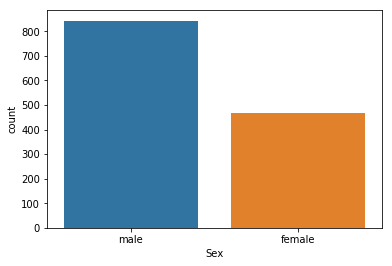

In [7]:
sns.countplot(x='Sex', data = full_df)
plt.show()

But women were far more likely to survive compared to men (data from the training set).

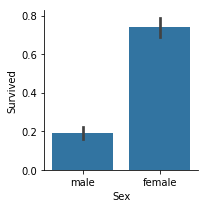

In [8]:
plot_categories(train_df , cat = 'Sex' , target = 'Survived', order = train_df.Sex.unique())
plt.show()

The distribution can also be plotted by age separating out the sexes.

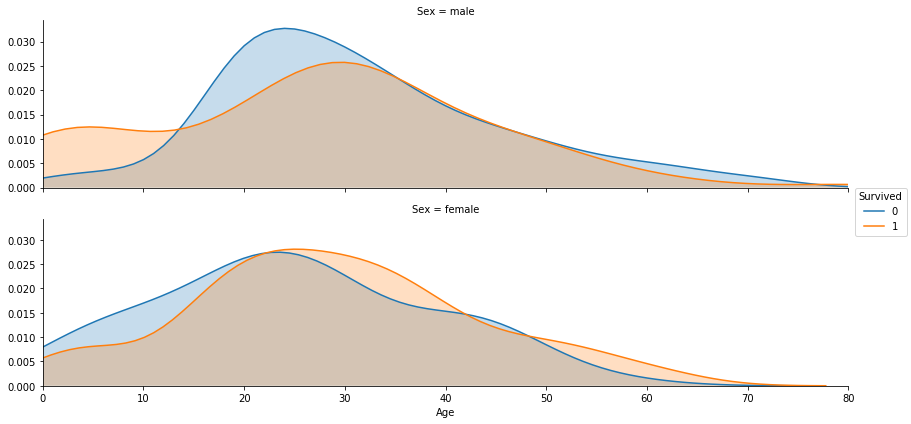

In [9]:
plot_distribution (train_df, var = 'Age' , target = 'Survived', row = 'Sex')
plt.show()

No data on sex was missing from the full dataset,

In [10]:
full_df.Sex.isnull().sum()

0

so we end by preparing our `Sex` variable for use in analytics by converting female/male to a binary 1/0 classification using a dictionary:

In [11]:
# replace sex string with a 0 or 1
gender_dict = {'female' : 1 , 'male' : 0}
full_df.Sex = full_df.Sex.map (gender_dict).astype(int)

### Embarked

Most of the passengers in our dataset got on the ship at port S,

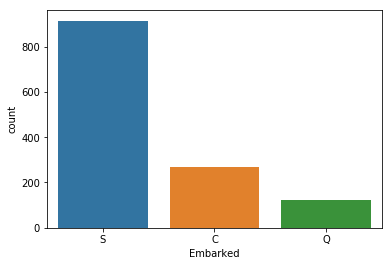

In [12]:
sns.countplot (x='Embarked', data=full_df)
plt.show()

and there may be a survial advantage to passengers who embarked from port C instead of S or Q (though this may arise from correlation with other variables in the dataset).

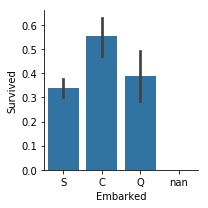

In [13]:
plot_categories(train_df , cat = 'Embarked' , target = 'Survived', order=train_df.Embarked.unique() )
plt.show()

Only two data points are missing from our full dataset,

In [14]:
full_df.Embarked.isnull().sum()

2

so we impute the two missing values with the most common port S and create a numerical dictionary for the `Embarked` variable:

In [15]:
# impute missing values with port 'S'
full_df.Embarked = full_df.Embarked.fillna('S')

# replace embarked label with a 1 or 2 or 3
embarked_dict = {'S' : 1 , 'C' : 2, 'Q' : 3}
full_df.Embarked = full_df.Embarked.map (embarked_dict).astype(int)

### Passenger Class

Most of the passengers were in class 3, with the remainder evenly split between classes 1 and 2,

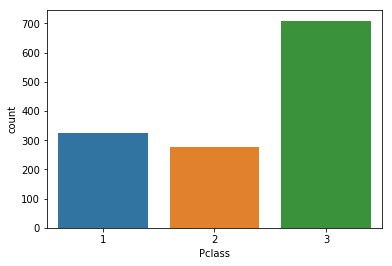

In [16]:
sns.countplot (x='Pclass', data=full_df)
plt.show()

But there is a clear bias to survival for passengers in higher classes,

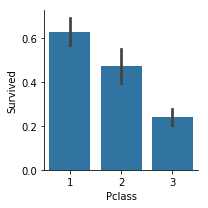

In [17]:
plot_categories( train_df , cat = 'Pclass' , target = 'Survived' )
plt.show()

We can plot this trend as a function of ticket fare and separate out the different classes. Note that higher fare usually seem to correlate with higher survival rates.

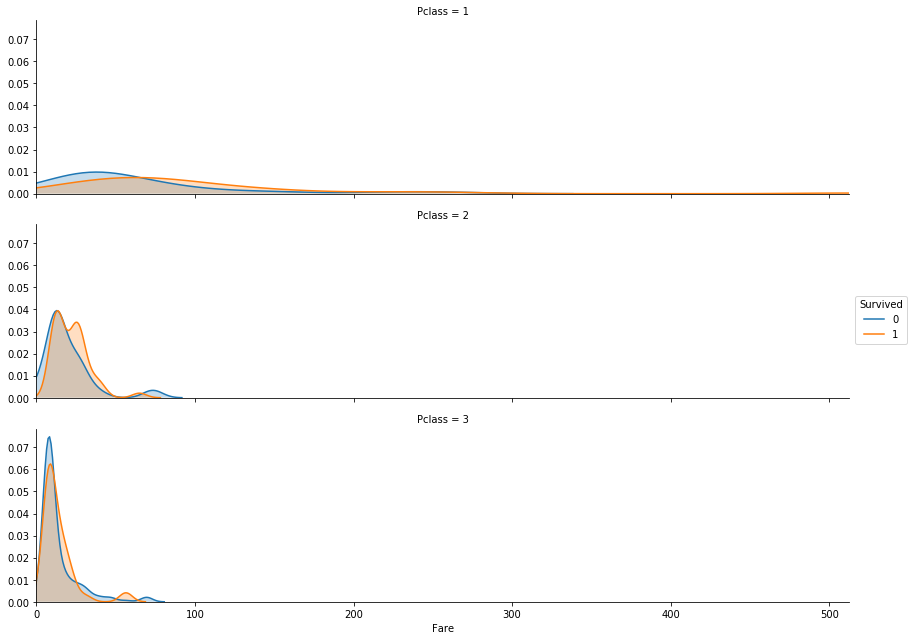

In [18]:
plot_distribution (train_df, var = 'Fare' , target = 'Survived' , row = 'Pclass' )
plt.show()

No class data is missing so there is nothing to impute,

In [19]:
full_df.Pclass.isnull().sum()

0

and our class variable is already numerical so we are done.

### Age

As can be seen, there is a sizable age range but most of the passengers were younger ranging from late teens to early 40s. 

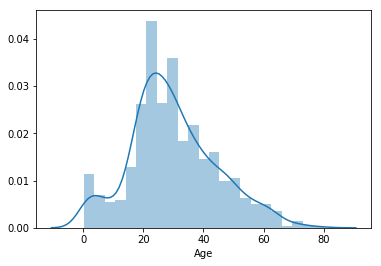

In [20]:
sns.distplot(full_df.Age.dropna(), hist=True)
plt.show()

We can also plot the survival as a function of age.

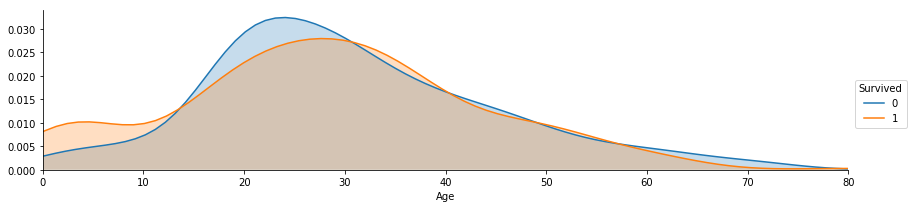

In [21]:
plot_distribution (train_df, var='Age', target='Survived')
plt.show()

Now we encounter our first pressing need to impute data as we are missing age data on 263 people or about 20% of the total passengers in our dataset.

In [22]:
full_df.Age.isnull().sum()

263

To impute this data, we plan to do something very simple: identify the mean age and it's standard deviation. Then we sample from a uniform distribution in the range of the mean plus/minus one standard deviation. This then gives us new random ages for each missing entry. Obviously this will introduce some random noise into our dataset. This is undesirable and this imputation should be improved for more accurate predictions.

In [23]:
age_mean = full_df.Age.mean()
age_std  = full_df.Age.std()

In [24]:
print ('Mean age is %f' % age_mean)
print ('Age standard deviation %f' % age_std)

Mean age is 29.881138
Age standard deviation 14.413493


In [25]:
age_null = full_df.Age.isnull().sum()

# create missing ages dataset
missing_ages = np.random.uniform (low = age_mean - age_std, high = age_mean + age_std, size = age_null)

# and add to full dataset
full_df.Age[np.isnan(full_df.Age)] = missing_ages

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


We plot the new histogram of ages and see that it is at least qualitatively similar to our age distribution before imputation.

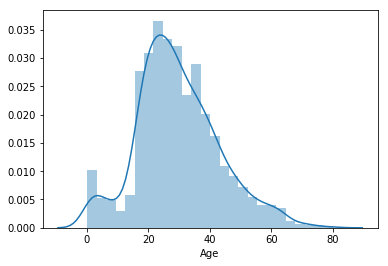

In [26]:
sns.distplot (full_df.Age, hist=True)
plt.show()

### Family

For the family variable, we plan to include both the `Parch` and `SibSp` variables. Below, we see that the majority of passengers had no relations on board.

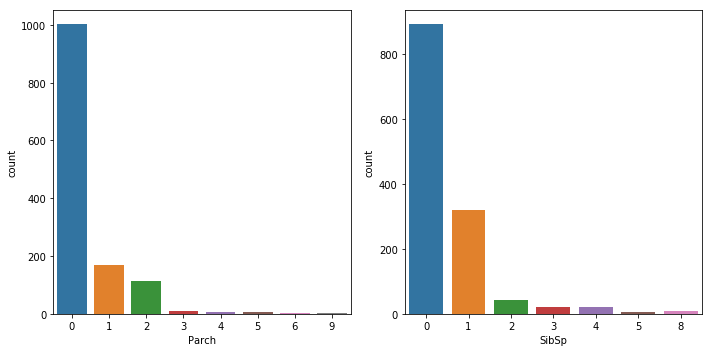

In [27]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

fig1 = sns.countplot(x='Parch', data = full_df, ax=axis1)
fig2 = sns.countplot(x='SibSp', data = full_df, ax=axis2)
plt.tight_layout()
plt.show()

And there might be a survival advantage to having a relation aboard.

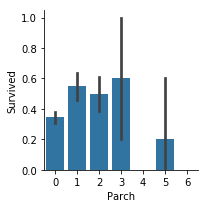

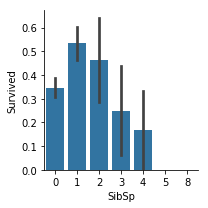

In [28]:
plot_categories(train_df , cat = 'Parch' , target = 'Survived')
plot_categories(train_df , cat = 'SibSp' , target = 'Survived')
plt.show()

Furthermore, we are missing no data from either variable, so there is no completion to do.

In [29]:
print (full_df.Parch.isnull().sum())
full_df.SibSp.isnull().sum()

0


0

To perform analytics, we choose to feature engineer such that we create a new binary variable on the total family size of the traveler.

In [30]:
family = pd.DataFrame()

family['FamilySize'] = full_df.Parch + full_df.SibSp + 1

full_df['FamilySize'] = family.FamilySize

### Name

Now we turn to the more complicated `Name` variable. These values will require some adjustments before they can be used for analytics. 

In [31]:
full_df.Name.head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

First we can verify that everyone in our dataset was given a name and therefore we don't need to do data imputation.

In [32]:
full_df.Name.isnull().sum()

0

In looking at the dataset above, the first thing we might want to do is sort these entries by the person's title (e.g., Mr, Master, etc..). The entry format for the variable goes `Last Name, Title. First Name`. The code below extracts this information and puts it into a new column called `Title`.

In [33]:
# we extract the title from each name: split along ',' and take the second. Then split along '.' and take the first. 
# Then strip() to remove whitespace
full_df ['Title'] = full_df.Name.map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )

# print unique titles
full_df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

Looking at the unique values outputted from our `Title` variable, we see that there are, broadly speaking, 4 repeated titles and many more with only a sporadic entry.

In [34]:
full_df.Title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Don               1
Mme               1
Sir               1
Dona              1
Jonkheer          1
Capt              1
the Countess      1
Name: Title, dtype: int64

To this end, we choose to feature engineer by replacing all but the 4 most repeated classes with a new variable `Rare` and then map each title to a unique number via a dictionary. 

In [35]:
full_df.Title = full_df.Title.replace (['Capt', 'Col', 'Major', 'Jonkheer', 'Don', 'Sir', 'Dr', 
                                        'Rev', 'the Countess', 'Dona', 'Lady'], 'Rare')

full_df.Title = full_df.Title.replace ('Mme', 'Mrs')
full_df.Title = full_df.Title.replace ('Mlle', 'Ms')
full_df.Title = full_df.Title.replace ('Miss', 'Ms')

# replace titles with numbers
title_dict = {'Rare' : 1 , 'Mrs' : 2, 'Ms' : 3, 'Mr' : 4, 'Master': 5}
full_df.Title = full_df.Title.map (title_dict).astype(int)

### Fare

The majority of passengers paid low fares as we learned earlier from the training dataset.

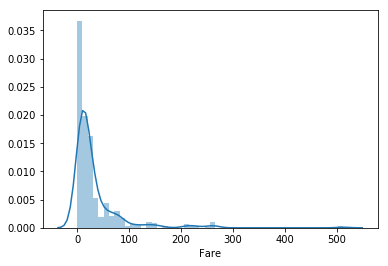

In [36]:
sns.distplot(full_df.Fare.dropna(), hist=True)
plt.show()

And as we saw earlier as well, higher fares tends to correlate with higher survival rates.

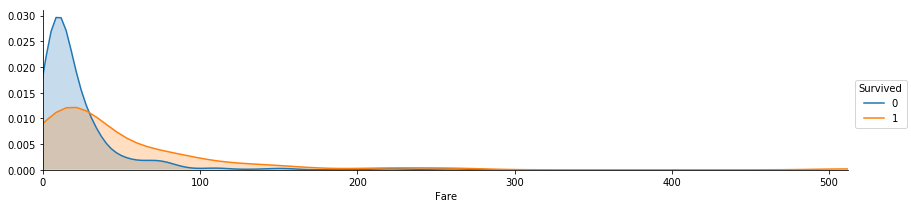

In [37]:
plot_distribution (train_df, var = 'Fare' , target = 'Survived')
plt.show()

In our full dataset, we are missing a `Fare` variable for one passenger.

In [38]:
full_df.Fare.isnull().sum()

1

Printing out the mean, mode, and median fares,

In [39]:
print ('Mean fare is %f' % train_df.Fare.mean())
print ('Mode fare is %f' % train_df.Fare.mode()[0])
print ('Median fare is %f' % train_df.Fare.median())

Mean fare is 32.204208
Mode fare is 8.050000
Median fare is 14.454200


and comparing to the histogram chart above, we arbitrarily choose to replace the missing fare with the median value,

In [40]:
full_df.Fare = full_df.Fare.fillna(train_df.Fare.median())

### Ticket

For the ticket variable, the general format is to have a ticket prefix followed by a number,

In [41]:
full_df.Ticket.head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

Further investigation reveals that there are 4 different types of entries for `Ticket`:

1. A pure number
2. A string separated from a number by a space
3. Two strings separated by a space then another space and a number
4. The string `LINE`

For our feature, we extract the number for the first 3 possibilities and map the string `LINE` to the number -1.

In [42]:
tick = pd.DataFrame()

tick['num'] = full_df.Ticket.map( lambda ticket: ticket.split( ' ' ))
full_df['TickNum'] = tick.num.map (lambda term: term[1] if len(term) == 2 else term[2] if len(term) == 3 else term[0])
full_df['TickNum'] = full_df.TickNum.map (lambda term: -1 if term == 'LINE' else term).astype(int)

### Cabin

Due to the great amount of missing data in `Cabin`, we choose to exclude it from our features. Future work might be able to add it in a meaningful way by correlating the missing values with other variables in our dataset.

## Dropping Elements

Now that feature engineering is done, we can drop columns from our dataframe that we don't plan to use in analysis. Note that this will also include data columns that we used to construct new features (e.g., `Name`). This is then bundled into a new dataframe called `engineered_df`.

In [43]:
drop_elements = ['Cabin', 'Name', 'PassengerId', 'Ticket', 'Parch', 'SibSp']

engineered_df = full_df.drop (drop_elements, axis = 1)

The new dataframe holds the features we want to use in our model and has no missing data.

In [44]:
engineered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
Age           1309 non-null float64
Embarked      1309 non-null int64
Fare          1309 non-null float64
Pclass        1309 non-null int64
Sex           1309 non-null int64
Survived      891 non-null float64
FamilySize    1309 non-null int64
Title         1309 non-null int64
TickNum       1309 non-null int64
dtypes: float64(3), int64(6)
memory usage: 92.1 KB


## Model Building

Now we want to go about training a method to accurately model our data. Of course we don't want the method to just *fit* our data, we also want it to *generalize* to the test data as well!

### Quick Correlations
<a id="analysis_qc"></a>

Let's perform a quick correlation plot to see which our of engineered features are most correlated with `Survival` in the training set:

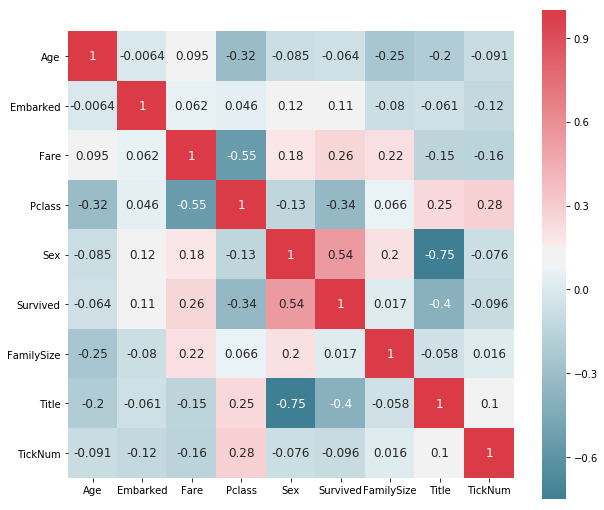

In [45]:
plot_correlation_map (engineered_df.loc[0:890])
plt.show()

The obvious suspects are: the sex of the passenger, the passenger's class, the passenger's title, and the ticket fare. Note however that `Fare` is correlated with `Pclass` and `Sex` is correlated with `Title` so some of these correlations may be redundant.

###  Validation from Training Data

Before applying a model to the problem of predicting survival of a passenger in the test dataset, we first want some idea of how well a given model is working. To this end, we can get a feel for this by splitting the training data into two sets: one for model training and another for model validation. The idea will be to fit the model to the sub-training dataset and then test it on the sub-validation dataset where the survival answer is already known. In doing this, we want to be wary of methods where the fit score is drastically different compared to the validation score. This is evidence that the chosen model is overfitting and will not generalize. Note that the `.loc` command which acts on dataframes is *inclusive* in both variables (c.f., normal slicing in python).

In [46]:
# create subtraining data from training dataset
subtrain_x = engineered_df.loc[0:800]
subtrain_x = subtrain_x.drop('Survived', axis=1)

# known surival rate for subtraining data
subtrain_y = engineered_df.Survived.loc[0:800]

# create subvalidation data from datatraining set
subvalid_x = engineered_df.loc[801:890]
subvalid_x = subvalid_x.drop('Survived', axis=1)

# known survival for subvalidation data
subvalid_y = engineered_df.Survived.loc[801:890]

For the purposes of this notebook, these different classification algorithms can be treated as blackboxes. However these methods should be understood if they are used in the future! 

### Logistic Regression

In [47]:
model = LogisticRegression()
model.fit( subtrain_x , subtrain_y )
print("Fit score is %f" % model.score( subtrain_x , subtrain_y ))
print("Validation score is %f" % model.score( subvalid_x, subvalid_y))

Fit score is 0.679151
Validation score is 0.666667


### Random Forest

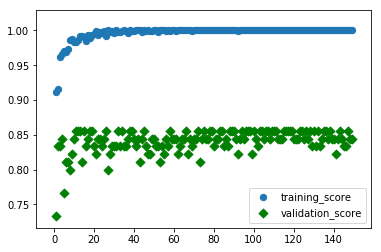

In [48]:
#model = RandomForestClassifier (n_estimators=100)
#model.fit( train_X , train_y )
#print (model.score( train_X , train_y ))# , model.score( valid_X , valid_y ))

RF_results = pd.DataFrame(columns=['estimators','training_score','validation_score'], index=range(0,149))

for estimators in range (1,150):
    model = RandomForestClassifier (n_estimators = estimators)
    model.fit( subtrain_x , subtrain_y )
    RF_results.loc[estimators-1, 'estimators'] = estimators
    RF_results.loc[estimators-1, 'training_score'] = model.score( subtrain_x , subtrain_y )
    RF_results.loc[estimators-1, 'validation_score'] = model.score( subvalid_x, subvalid_y)
    
plt.scatter(RF_results.estimators, RF_results.training_score, s=40)
plt.scatter(RF_results.estimators, RF_results.validation_score, s=40, marker='D', c='green')

# print best fit result for lowest number of estimators
#print ("Best Random Forest Result %f. First acheived with %f estimators" % (RF_results.training_score.max() , #RF_results.sore.idxmax()+1))
plt.legend()
plt.show()

### Support Vector Machines

In [49]:
model = SVC()
model.fit( subtrain_x , subtrain_y )
print("Fit score is %f" % model.score( subtrain_x , subtrain_y ))
print("Validation score is %f" % model.score( subvalid_x, subvalid_y))

Fit score is 0.998752
Validation score is 0.644444


### Gradient Boosting Classifier

In [50]:
model = GradientBoostingClassifier()
model.fit( subtrain_x , subtrain_y )
print("Fit score is %f" % model.score( subtrain_x , subtrain_y ))
print("Validation score is %f" % model.score( subvalid_x, subvalid_y))

Fit score is 0.913858
Validation score is 0.877778


### K-nearest Neighbors

In [51]:
KNN_results = pd.DataFrame(columns=['dots','training_score','validation_score'], index=range(0,10))

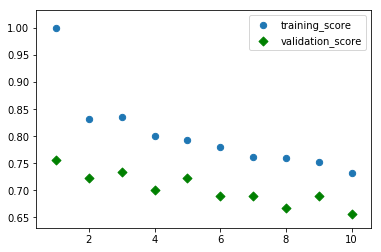

In [52]:
for dots in range (1,11):
    model = KNeighborsClassifier(n_neighbors=dots)
    model.fit( subtrain_x , subtrain_y )
    KNN_results.loc[dots-1, 'dots'] = dots
    KNN_results.loc[dots-1, 'training_score'] = model.score( subtrain_x , subtrain_y )
    KNN_results.loc[dots-1, 'validation_score'] = model.score (subvalid_x, subvalid_y)
    
plt.scatter(KNN_results.dots, KNN_results.training_score, s=40)
plt.scatter(KNN_results.dots, KNN_results.validation_score, s=40, marker='D', c='green')
#print ("Best KNN Result %f with %f neighbors" % (KNN_results.score.max() , KNN_results.score.idxmax()+1))
plt.legend()
plt.show()

### Gaussian Naive Bayes

In [53]:
model = GaussianNB()
model.fit( subtrain_x , subtrain_y )
print("Fit score is %f" % model.score( subtrain_x , subtrain_y ))
print("Validation score is %f" % model.score( subvalid_x, subvalid_y))

Fit score is 0.661673
Validation score is 0.700000


## Model Selection,Training, and Prediction

Now we've tested a whole bunch of different methods on our sub-training dataset and assessed it with our sub-validation dataset. Model selection itself is an involved process with it's own theorems and algorithms, but here we'll be crude and just go off the fit and validation scores. Fit and validation scores which are very different from another suggest that our algorithm is overfitting so we'll want to avoid those. At the same time, we want the highest possible score. Glancing through the scores for the different methods, it looks like Gradient Boosting Classifier is the winner. The fit/validation scores are not too disparate (low 90s vs. high 80s) and the scores are quite high. As such, we now use the full set of training data to fit the model,  

In [54]:
# full training data
train_x = engineered_df.loc[0:890]
train_x = train_x.drop('Survived', axis=1)

# full training survival rate
train_y = train_df.Survived.loc[:]

# passengers whose survival we want to predict
valid_x = engineered_df.loc[891:]
valid_x = valid_x.drop('Survived', axis=1)


model = GradientBoostingClassifier()
model.fit( train_x , train_y )
print("Training Fit score is %f" % model.score( train_x , train_y ))

Training Fit score is 0.909091


## Data Output

Finally we go about making a prediction (`test_y`) for the unknown passenger data (`valid_x`). We verify that this has the right shape and column format, and then output it to a csv file and upload it to kaggle.

In [55]:
passenger_id = full_df.PassengerId[891:]

test_y = model.predict (valid_x)
output = pd.DataFrame ({'PassengerId': passenger_id, 'Survived' : test_y})
print(output.shape) ; print(output.head()) ; output.to_csv('predictions_titanic.csv', index=False)

(418, 2)
     PassengerId  Survived
891          892         0
892          893         1
893          894         0
894          895         0
895          896         1


After uploading, we see that the score for this model is 0.78468. This is better than random guessing (score $\approx$ 0.5) but is a little low compared to our validation and training scores. There is some variation with each prediction set generated due to the use of random numbers in completing the `Age` variable. Improving this feature will likely produce a better validation score and decrease the volatility as well. 

# Appendix
<a id="appendix"></a>

## Types of Variables
<a id="app_vartypes"></a>

### Categorical Variables
<a id="app_categorical"></a>

Categorical variables are *qualitative* and take on only a limited number of values. There are 3 types, nominal, ordinal, and interval:

* A **nominal variable** (sometimes called a **categorical variable**) is one that has two or more categories, but there is no intrinsic ordering to the categories, e.g., gender, hair color
<br><br>
* An **ordinal variable** is a type of categorical variable but one for which a clear ordering exists, e.g., education level (elementary, high school, college, graduate)
<br><br>
* An **interval variable** is similar to an ordinal variable but is defined on intervals that are equally spaced, e.g., whether someone is in the \$20,000-\$30,000, \$30,000-\$40,000, or \$40,000-\$50,000 income bracket

### Numerical Variables
<a id="app_numerical"></a>

Numerical variables are *quantitative* and have numbers as their values. There are 2 types, continuous and discrete:

* A **continuous variable** can take on any value in some range, e.g., the height of a person
<br><br>
* A **discrete variable** can only take on a specific number, e.g., how many siblings does a person have

## Resources
<a id='resources'></a>

[Megan Risdal's Notebook in R](https://www.kaggle.com/mrisdal/exploring-survival-on-the-titanic)

[Helge Bjorland's Notebook](https://www.kaggle.com/helgejo/an-interactive-data-science-tutorial)

[Manav Sehgal's Notebook](https://www.kaggle.com/startupsci/titanic-data-science-solutions)

[Omar El Gabry's Notebook](https://www.kaggle.com/omarelgabry/a-journey-through-titanic)

[Arthur Tok's Notebook](https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python)

[Sina's Notebook](https://www.kaggle.com/sinakhorami/titanic-best-working-classifier)

[IBM Markdown Cheatsheet](http://datascience.ibm.com/blog/markdown-for-jupyter-notebooks-cheatsheet/)

[Another Markdown Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Here-Cheatsheet)

[Discussion on categorical variables](https://stats.idre.ucla.edu/other/mult-pkg/whatstat/what-is-the-difference-between-categorical-ordinal-and-interval-variables/)